<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Load-data-set" data-toc-modified-id="Load-data-set-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Load data set</a></span></li></ul></li><li><span><a href="#Consonant-Stats" data-toc-modified-id="Consonant-Stats-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Consonant Stats</a></span><ul class="toc-item"><li><span><a href="#Total-consonant-stats" data-toc-modified-id="Total-consonant-stats-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Total consonant stats</a></span></li><li><span><a href="#Words-with-consonant-stats" data-toc-modified-id="Words-with-consonant-stats-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Words with consonant stats</a></span></li><li><span><a href="#Treemap-graphs" data-toc-modified-id="Treemap-graphs-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Treemap graphs</a></span></li></ul></li><li><span><a href="#CV-Stats" data-toc-modified-id="CV-Stats-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CV Stats</a></span><ul class="toc-item"><li><span><a href="#Total-syllable-stats" data-toc-modified-id="Total-syllable-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Total syllable stats</a></span></li><li><span><a href="#Words-with-syllable-stats" data-toc-modified-id="Words-with-syllable-stats-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Words with syllable stats</a></span></li><li><span><a href="#Treemap-graphs" data-toc-modified-id="Treemap-graphs-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Treemap graphs</a></span></li></ul></li></ul></div>

## Packages

In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import squarify

## Load data set

In [2]:
file_name = "PtLanka.csv"

word_df = pd.read_csv(file_name)
word_df

,SriLanka_creole,phonetic_transcription,Portuguese_definition,English_definition,pos,Related_languages,pt_related annotations,sources,original_full_entry,original_Portuguese_definition,original_linguistic_notes,page
0,Abaço,abaso,abaixo,below,adverb,NaN,NaN,NaN,"Abaço, abaixo. P. us. V.",abaixo,pouco usado,135.0
1,Aberçà,abeɾsaː,abraçar,hug,verb,NaN,NaN,"O Bruffador, ii periódico","Aberçà, abersà, aburçá {Br. 2), abraçar.",abraçar,NaN,135.0
2,abersà,abeɾsaː,abraçar,hug,verb,NaN,NaN,"O Bruffador, ii periódico","Aberçà, abersà, aburçá {Br. 2), abraçar.",abraçar,NaN,135.0
3,aburçá,abuɾsaː,abraçar,hug,verb,NaN,NaN,"O Bruffador, ii periódico","Aberçà, abersà, aburçá {Br. 2), abraçar.",abraçar,NaN,135.0
4,Aburcé,abuɾseː,aborrecer,annoy,verb,NaN,NaN,NaN,Aburcé. Mais us. burcé.,Mesmo que burcé,NaN,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2517,Wine,ʋine,vinho europeu,european wine,noun,English,NaN,NaN,NaN,vinho europeu,NaN,NaN
2518,Zumbá,zumbaː,zombar,mock,verb,NaN,NaN,NaN,"Zumba, zombar. Zombe-rías, zombrias, zombàrios...",zombar,NaN,182.0
2519,Zomberías,zombeɾiːas,zombarias,mockery,noun,NaN,NaN,NaN,NaN,zombarias,NaN,NaN
2520,zombrias,zombɾias,zombarias,mockery,noun,NaN,NaN,NaN,NaN,zombarias,NaN,NaN


In [3]:
word_list = list(word_df["phonetic_transcription"])
word_list = [" ".join(list(str(i))) for i in word_list]
word_list

['a b a s o',
 'a b e ɾ s a ː',
 'a b e ɾ s a ː',
 'a b u ɾ s a ː',
 'a b u ɾ s e ː',
 'a b l a ː',
 'a b o ɾ s i d o',
 'a b s e n s a',
 'a b s e n t e',
 'a b u n d a m e n t e',
 'a b i s o',
 'a k a ː',
 'a k s e p t a ː',
 'a k s e p t a s a ː o',
 'a k s e p t a ʋ e l',
 'a k o o m p i ɲ a ː',
 'a k o ɾ d a ː',
 'a k o o ɾ d a n s a',
 'a k o ɾ d a n s e ː',
 'a s e n t o',
 'a s e ɾ t o',
 'a t ̠ ʃ a ɾ',
 'a s o ɾ a g e',
 'a d e',
 'a d e m',
 'a d e',
 'a d e ː o',
 'a d i o ː t o',
 'a d i ʋ u',
 'a d i u',
 'a d i o',
 'a d e ː o',
 'a d ̠ ʒ u d a ː',
 'a d m i ɾ a l',
 'a d u l t e ː ɾ i a',
 'a d u l t e ɾ a s a ː o',
 'a d u l t e ɾ i o z o',
 'a d u l t e i ɾ o z o',
 'a d ʋ o k a t',
 'a d ʋ o g a d o ɾ',
 'a f a d ̠ ʒ a d o',
 'a f e s a n',
 'a f l i k t a ː',
 'a ː g o ː',
 'a g o ː ɾ',
 'a g o r a',
 'a g o r e ː',
 'a g ɾ a d a d o',
 'a g u a ː',
 'a g u ʋ a ː',
 'a i n d e ː',
 'a i o',
 'a d ̠ ʒ o',
 'a l a ː',
 'a l a ː',
 'a l b ɾ e',
 'a ː l b ɾ i',
 'a ː l 

# Consonant Stats

In [4]:
word_list = [re.sub("(?<=[aeiout]) ː", "ː", i) for i in word_list]
word_list = [re.sub("(?<=[nl]) ʲ", "ʲ", i) for i in word_list]
word_list = [re.sub("d ̠ ʒ", "d̠ʒ", i) for i in word_list]
word_list = [re.sub("t ̠ ʃ", "t̠ʃ", i) for i in word_list]
word_list = [re.sub("^", " ", i) for i in word_list]
word_list = [re.sub("$", " ", i) for i in word_list]

word_list[0:10]

[' a b a s o ',
 ' a b e ɾ s aː ',
 ' a b e ɾ s aː ',
 ' a b u ɾ s aː ',
 ' a b u ɾ s eː ',
 ' a b l aː ',
 ' a b o ɾ s i d o ',
 ' a b s e n s a ',
 ' a b s e n t e ',
 ' a b u n d a m e n t e ']

In [5]:
word_list_split = [i.split(" ") for i in word_list]
word_list_split = [item for sublist in word_list_split for item in sublist]
word_list_split = [x for x in word_list_split if x]
vowel_punct = ["a","aː","e","eː","i","iː","o","oː","u","uː","ə","-"]
word_list_split = [e for e in word_list_split if e not in vowel_punct]

## Total consonant stats

In [6]:
counts = Counter(word_list_split)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ["IPA", "count"]
df = df.sort_values(by=["count"],ascending=False).reset_index(drop=True)
df

,IPA,count
0,ɾ,1273
1,s,1055
2,d,905
3,n,874
4,t,847
5,m,679
6,p,545
7,k,530
8,l,461
9,ʋ,310


## Words with consonant stats

In [7]:
IPA_list = list(df["IPA"])
in_word_list = []
for word in IPA_list:
    word_search = " "+ word + " "
    matches = len([match for match in word_list if word_search in match])
    in_word_list.append(matches)
df["word_count"] = in_word_list
df["IPA_count_label"] = df["IPA"] + " : " + df["count"].astype(str)
df["IPA_word_count_label"] = df["IPA"] + " : " + df["word_count"].astype(str)
df

,IPA,count,word_count,IPA_count_label,IPA_word_count_label
0,ɾ,1273,1160,ɾ : 1273,ɾ : 1160
1,s,1055,938,s : 1055,s : 938
2,d,905,772,d : 905,d : 772
3,n,874,780,n : 874,n : 780
4,t,847,777,t : 847,t : 777
5,m,679,639,m : 679,m : 639
6,p,545,519,p : 545,p : 519
7,k,530,517,k : 530,k : 517
8,l,461,458,l : 461,l : 458
9,ʋ,310,307,ʋ : 310,ʋ : 307


## Treemap graphs

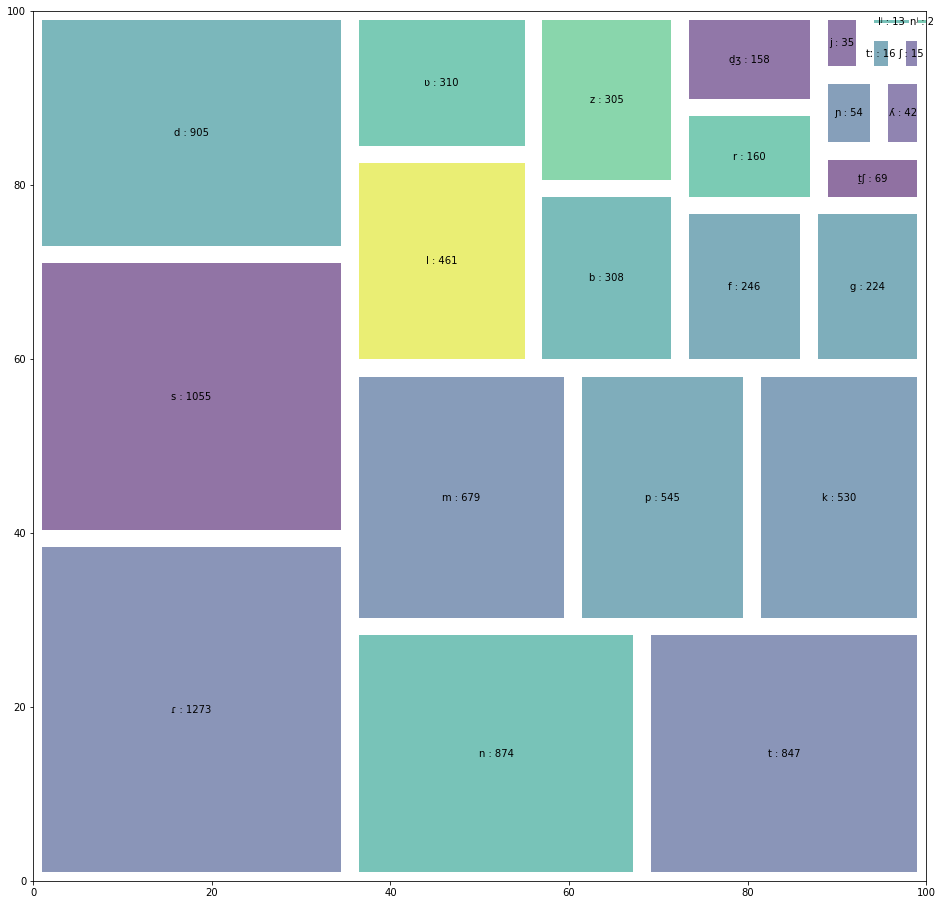

In [8]:
labels = list(df["IPA_count_label"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

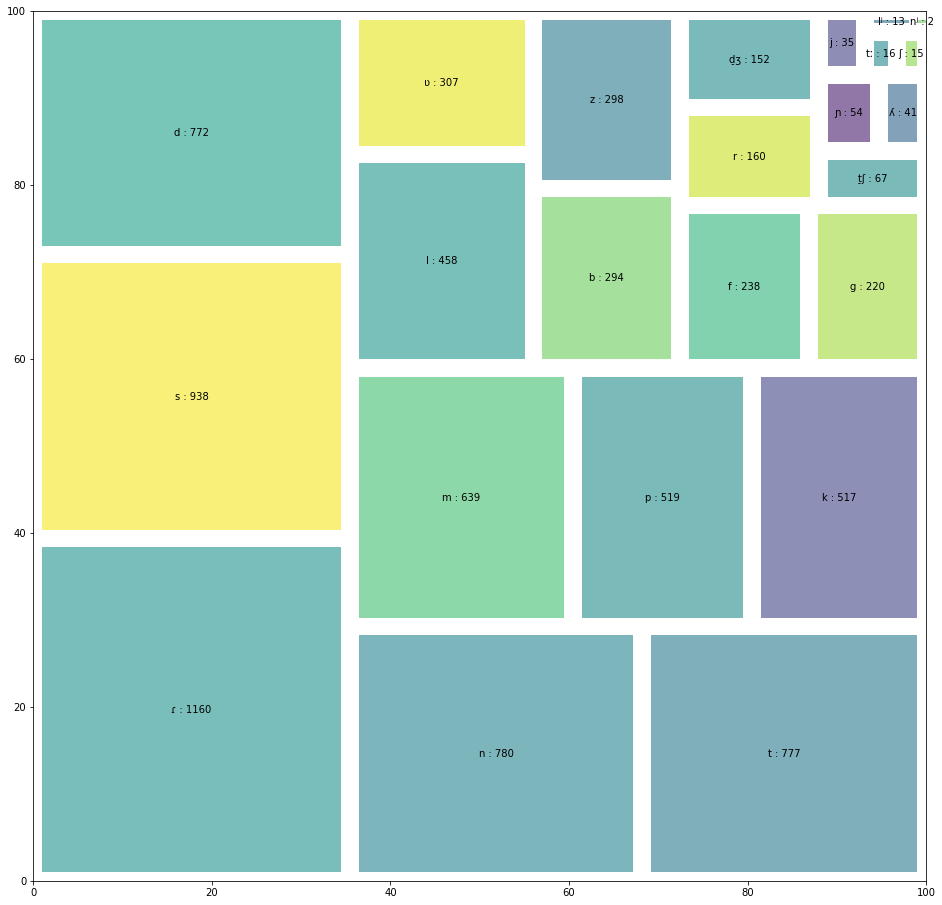

In [9]:
labels = list(df["IPA_word_count_label"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

# CV Stats

## Load dataset

In [10]:
file_name = "crioulo_IPA_CV.csv"

word_df = pd.read_csv(file_name)
word_df

,SriLanka_creole,phonetic_transcription,phono_TRSVD,phono_CV
0,Abaço,abaso,V.TV.SV,V.CV.CV
1,Aberçà,abeɾsaː,V.TVR.SV,V.CVC.CV
2,abersà,abeɾsaː,V.TVR.SV,V.CVC.CV
3,aburçá,abuɾsaː,V.TVR.SV,V.CVC.CV
4,Aburcé,abuɾseː,V.TVR.SV,V.CVC.CV
...,...,...,...,...
2517,Wine,ʋine,TV.RV,CV.CV
2518,Zumbá,zumbaː,SVR.TV,CVC.CV
2519,Zomberías,zombeɾiːas,SVR.TV.RV.VS,CVC.CV.CV.VC
2520,zombrias,zombɾias,SVR.TRV.VS,CVC.CCV.VC


In [11]:
word_list_CV = list(word_df["phono_CV"])
word_list_split = [i.split(".") for i in word_list_CV]
word_list_split = [item for sublist in word_list_split for item in sublist]
word_list_split = [i.split(" ") for i in word_list_split]
word_list_split = [item for sublist in word_list_split for item in sublist]
word_list_split[:] = [x for x in word_list_split if x]

## Total syllable stats

In [12]:
counts = Counter(word_list_split)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ["CV", "count"]
df = df.sort_values(by=["count"],ascending=False).reset_index(drop=True)
df

,CV,count
0,CV,4457
1,CVC,1389
2,V,733
3,CCV,399
4,VC,219
5,CVG,123
6,CCVC,98
7,C,94
8,CVCV,80
9,CCVG,16


## Words with syllable stats

In [13]:
word_list_CV = [re.sub("\.", " ", i) for i in word_list_CV]
word_list_CV = [re.sub("^", " ", i) for i in word_list_CV]
word_list_CV = [re.sub("$", " ", i) for i in word_list_CV]

In [14]:
CV_list = list(df["CV"])
in_word_list = []
for word in CV_list:
    word_search = " "+ word + " "
    matches = len([match for match in word_list_CV if word_search in match])
    in_word_list.append(matches)
df["word_count"] = in_word_list
df["word_count"] = in_word_list
df["CV_count_label"] = df["CV"] + " : " + df["count"].astype(str)
df["CV_word_count_label"] = df["CV"] + " : " + df["word_count"].astype(str)
df

,CV,count,word_count,CV_count_label,CV_word_count_label
0,CV,4457,2292,CV : 4457,CV : 2292
1,CVC,1389,1155,CVC : 1389,CVC : 1155
2,V,733,661,V : 733,V : 661
3,CCV,399,395,CCV : 399,CCV : 395
4,VC,219,216,VC : 219,VC : 216
5,CVG,123,121,CVG : 123,CVG : 121
6,CCVC,98,97,CCVC : 98,CCVC : 97
7,C,94,86,C : 94,C : 86
8,CVCV,80,79,CVCV : 80,CVCV : 79
9,CCVG,16,16,CCVG : 16,CCVG : 16


## Treemap graphs

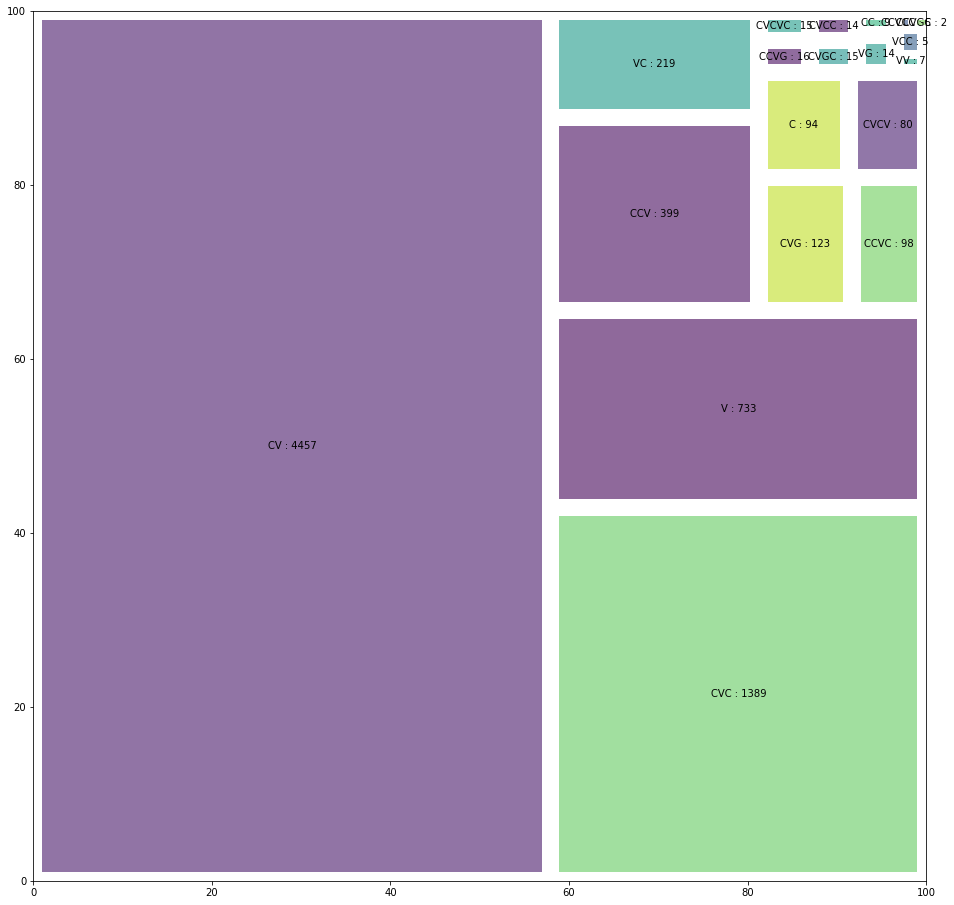

In [15]:
labels = list(df["CV_count_label"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

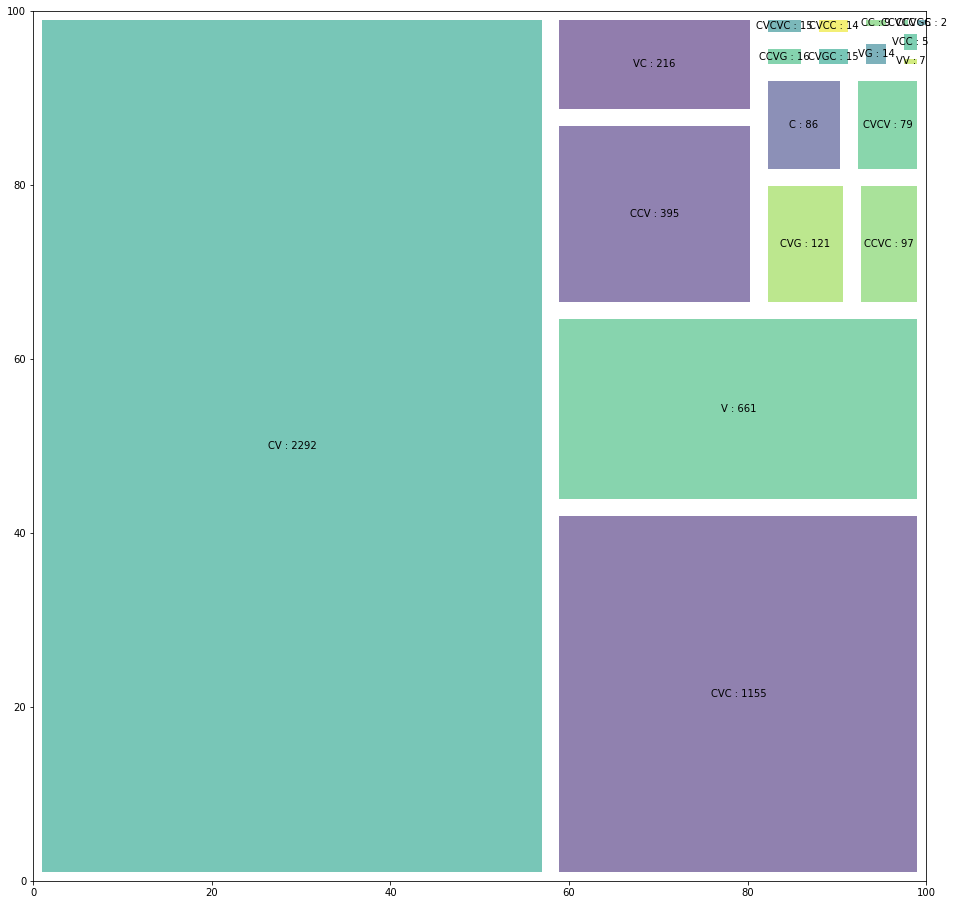

In [16]:
labels = list(df["CV_word_count_label"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

In [17]:
word_df[word_df['phono_CV']=="C"]

,SriLanka_creole,phonetic_transcription,phono_TRSVD,phono_CV
